In [1]:
import requests
import sys 
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))
from credential import FMP_API_KEY
from highlight_text import ax_text,fig_text
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import morethemes as mt 

In [2]:
url = "https://financialmodelingprep.com/api/v3/income-statement/AAPL"
params = {
    "period": "annual",
    "limit": 10,
    "apikey": FMP_API_KEY
}

r = requests.get(url, params=params, timeout=30)
data = r.json()
print(data)



[{'date': '2024-09-28', 'symbol': 'AAPL', 'reportedCurrency': 'USD', 'cik': '0000320193', 'fillingDate': '2024-11-01', 'acceptedDate': '2024-11-01 06:01:36', 'calendarYear': '2024', 'period': 'FY', 'revenue': 391035000000, 'costOfRevenue': 210352000000, 'grossProfit': 180683000000, 'grossProfitRatio': 0.4620634982, 'researchAndDevelopmentExpenses': 31370000000, 'generalAndAdministrativeExpenses': 0, 'sellingAndMarketingExpenses': 0, 'sellingGeneralAndAdministrativeExpenses': 26097000000, 'otherExpenses': 0, 'operatingExpenses': 57467000000, 'costAndExpenses': 267819000000, 'interestIncome': 0, 'interestExpense': 0, 'depreciationAndAmortization': 11445000000, 'ebitda': 134661000000, 'ebitdaratio': 0.3443707085, 'operatingIncome': 123216000000, 'operatingIncomeRatio': 0.3151022287, 'totalOtherIncomeExpensesNet': 269000000, 'incomeBeforeTax': 123485000000, 'incomeBeforeTaxRatio': 0.3157901467, 'incomeTaxExpense': 29749000000, 'netIncome': 93736000000, 'netIncomeRatio': 0.2397125577, 'eps'

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
0,2024-09-28,AAPL,USD,0000320193,2024-11-01,2024-11-01 06:01:36,2024,FY,391035000000,210352000000,...,0.315790,29749000000,93736000000,0.239713,6.11,6.08,15343783000,15408095000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
1,2023-09-30,AAPL,USD,0000320193,2023-11-03,2023-11-02 18:08:27,2023,FY,383285000000,214137000000,...,0.296740,16741000000,96995000000,0.253062,6.16,6.13,15744231000,15812547000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2,2022-09-24,AAPL,USD,0000320193,2022-10-28,2022-10-27 18:01:14,2022,FY,394328000000,223546000000,...,0.302040,19300000000,99803000000,0.253096,6.15,6.11,16215963000,16325819000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
3,2021-09-25,AAPL,USD,0000320193,2021-10-29,2021-10-28 18:04:28,2021,FY,365817000000,212981000000,...,0.298529,14527000000,94680000000,0.258818,5.67,5.61,16701272000,16864919000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
4,2020-09-26,AAPL,USD,0000320193,2020-10-30,2020-10-29 18:06:25,2020,FY,274515000000,169559000000,...,0.244398,9680000000,57411000000,0.209136,3.31,3.28,17352119000,17528214000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...


## Data cleaning
- [x] remove unncessary columns: `fillingDate`, `acceptedDate`, `period`, `date`, `symbol`, `reportedCurrency`, `cik`, `link`, `fina`   - done
- [x] display value in as proper format  - done 
- [x] tranform the data from width to height - done 
   

In [5]:
df.drop(columns=['fillingDate', 'acceptedDate', 'period', 'date', 'symbol', 'reportedCurrency', 'cik', 'link', 'finalLink'], inplace=True)

In [6]:
df

,calendarYear,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,...,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil
0,2024,391035000000,210352000000,180683000000,0.462063,31370000000,0,0,26097000000,0,...,269000000,123485000000,0.315790,29749000000,93736000000,0.239713,6.11,6.08,15343783000,15408095000
1,2023,383285000000,214137000000,169148000000,0.441311,29915000000,0,0,24932000000,0,...,-565000000,113736000000,0.296740,16741000000,96995000000,0.253062,6.16,6.13,15744231000,15812547000
2,2022,394328000000,223546000000,170782000000,0.433096,26251000000,0,0,25094000000,0,...,-334000000,119103000000,0.302040,19300000000,99803000000,0.253096,6.15,6.11,16215963000,16325819000
3,2021,365817000000,212981000000,152836000000,0.417794,21914000000,0,0,21973000000,0,...,258000000,109207000000,0.298529,14527000000,94680000000,0.258818,5.67,5.61,16701272000,16864919000
4,2020,274515000000,169559000000,104956000000,0.382332,18752000000,0,0,19916000000,0,...,803000000,67091000000,0.244398,9680000000,57411000000,0.209136,3.31,3.28,17352119000,17528214000


In [7]:
df_format = df.melt(
    id_vars=["calendarYear"],        # keep the year fixed
    var_name="Metric",               # new column for metric names
    value_name="Value"               # new column for metric values
)

In [8]:
df_format

,calendarYear,Metric,Value
0,2024,revenue,3.910350e+11
1,2023,revenue,3.832850e+11
2,2022,revenue,3.943280e+11
3,2021,revenue,3.658170e+11
4,2020,revenue,2.745150e+11
...,...,...,...
135,2024,weightedAverageShsOutDil,1.540810e+10
136,2023,weightedAverageShsOutDil,1.581255e+10
137,2022,weightedAverageShsOutDil,1.632582e+10
138,2021,weightedAverageShsOutDil,1.686492e+10


In [9]:
df_revenue = df_format[df_format['Metric'] == 'revenue']
df_revenue

,calendarYear,Metric,Value
0,2024,revenue,3.910350e+11
1,2023,revenue,3.832850e+11
2,2022,revenue,3.943280e+11
3,2021,revenue,3.658170e+11
4,2020,revenue,2.745150e+11


In [10]:
df_revenue['value_billion'] = df_revenue['Value']/10**9
df_revenue['value_billion'] = df_revenue['value_billion'].map("{:,.2f}".format)
df_revenue


C:\Users\dqthi\AppData\Local\Temp\ipykernel_27980\2077917842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue['value_billion'] = df_revenue['Value']/10**9
C:\Users\dqthi\AppData\Local\Temp\ipykernel_27980\2077917842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue['value_billion'] = df_revenue['value_billion'].map("{:,.2f}".format)


,calendarYear,Metric,Value,value_billion
0,2024,revenue,3.910350e+11,391.04
1,2023,revenue,3.832850e+11,383.29
2,2022,revenue,3.943280e+11,394.33
3,2021,revenue,3.658170e+11,365.82
4,2020,revenue,2.745150e+11,274.51


In [11]:
df_revenue["calendarYear"] = (
    df_revenue["calendarYear"]
    .astype(str)                 # make sure everything is string
    .str.strip()                 # remove leading/trailing spaces
    .str.replace(r"\.0$", "", regex=True)  # drop '.0' if present
    .astype("Int32")                 # finally cast to int
)

C:\Users\dqthi\AppData\Local\Temp\ipykernel_27980\1750495670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue["calendarYear"] = (


In [12]:
print(df_revenue['calendarYear'].unique())

<IntegerArray>
[2024, 2023, 2022, 2021, 2020]
Length: 5, dtype: Int32


In [13]:
type(df_revenue.loc[0, "calendarYear"]), df_revenue["calendarYear"].unique()


(numpy.int32,
 <IntegerArray>
 [2024, 2023, 2022, 2021, 2020]
 Length: 5, dtype: Int32)

In [14]:
df_revenue["value_billion"] = (
    df_revenue["value_billion"].astype(str).str.replace(",", "", regex=False)
    .pipe(pd.to_numeric, errors="coerce")
)

C:\Users\dqthi\AppData\Local\Temp\ipykernel_27980\3641463991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue["value_billion"] = (


In [15]:
df_revenue.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   calendarYear   5 non-null      Int32  
 1   Metric         5 non-null      object 
 2   Value          5 non-null      float64
 3   value_billion  5 non-null      float64
dtypes: Int32(1), float64(2), object(1)
memory usage: 357.0+ bytes


# To follow up:  
- try writing a function that appy value formatting (e.i add comma between thousand) to the select list of columns  

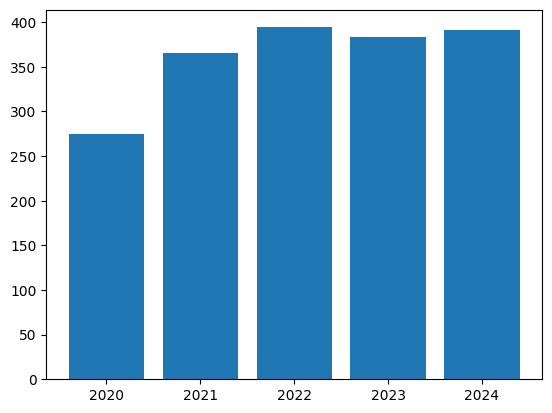

In [16]:
# step 1, populate the draft chart to visualize 

fig, ax = plt.subplots()
x = df_revenue['calendarYear']
y = df_revenue['value_billion']
ax.bar(
    x,y
)
ax = ax 

plt.show()

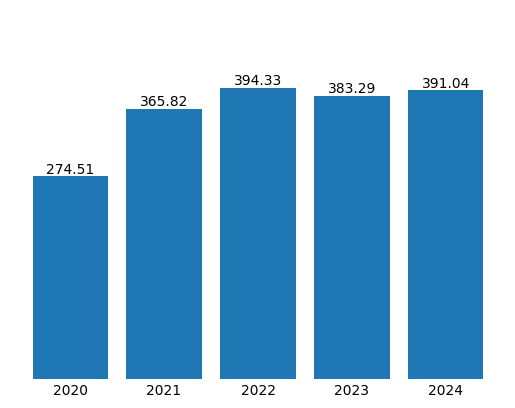

In [17]:
# step 2:  
# remove the border line 
# remove y value   
# starting number of y value to be 0, while the max value is 5000   

fig, ax = plt.subplots()
x = df_revenue['calendarYear']
y = df_revenue['value_billion']
bar_container = ax.bar(x,y)
for spine in ['top','right','bottom','left']:
    ax.spines[spine].set_visible(False),
# ax.set_xticks([])
ax.set_yticks([]) # to remove border line,
ax.tick_params(length=0), # to remove x - ticks,
plt.ylim(0,500),  # starting number of y value to be 0, while the max value is 5000   
ax.bar_label(bar_container, label_type='edge', fmt=lambda x: f'{x:,.2f}')
ax = bar_container

plt.show()

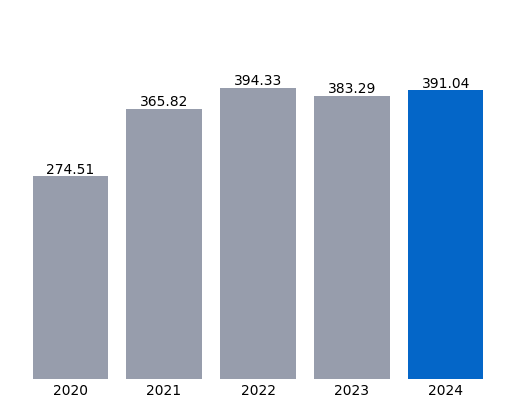

In [18]:
# step 2:  
# remove the border line 
# remove y value   
# starting number of y value to be 0, while the max value is 5000   

# step 3:  
# apply formating
# setting color for 2024, prior year to grey   

blue = '#0466c8'
grey = '#979dac'
colors = [
    blue if year == 2024 else grey
    for year in df_revenue["calendarYear"]
]

fig, ax = plt.subplots()
x = df_revenue['calendarYear']
y = df_revenue['value_billion']
bar_container = ax.bar(x,y,color = colors)
for spine in ['top','right','bottom','left']:
    ax.spines[spine].set_visible(False),
ax.set_yticks([]) # to remove border line,
ax.tick_params(length=0), # to remove x - ticks,
plt.ylim(0,500),  # starting number of y value to be 0, while the max value is 5000   
ax.bar_label(bar_container, label_type='edge', fmt=lambda x: f'{x:,.2f}')
ax = bar_container



plt.show()

In [19]:
def cagr(begin_value, end_value, periods):
    return (end_value / begin_value) ** (1/periods) - 1    

In [20]:
start_year = df_revenue['calendarYear'].min()
end_year = df_revenue['calendarYear'].max()

begin_value = df_revenue.loc[df_revenue['calendarYear'] == start_year,'value_billion'].values[0]
end_value = df_revenue.loc[df_revenue['calendarYear'] == end_year,'value_billion'].values[0]
periods = end_year - start_year 

In [21]:
apple_cagr = cagr(begin_value, end_value, periods )
apple_cagr

np.float64(0.09248568136117785)

In [114]:
background_color = '#FCD0AF'

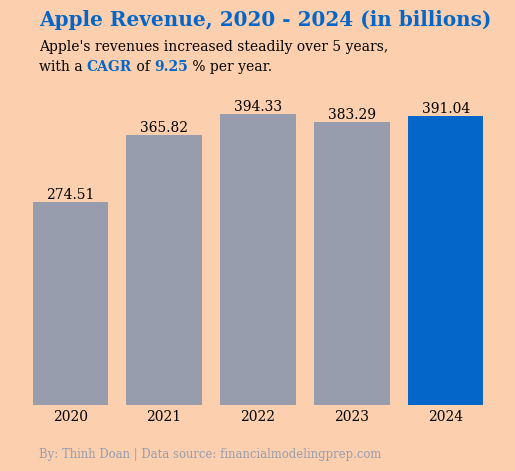

In [120]:
# step 2:  
## remove the border line 
## remove y value   
## starting number of y value to be 0, while the max value is 5000   

# step 3:  
## apply formating
## setting color for 2024, prior year to grey   

# step 4:  
## add chart title 
## add chart sub title  

blue = '#0466c8'
grey = '#979dac'
colors = [
    blue if year == 2024 else grey
    for year in df_revenue["calendarYear"]
]

fig, ax = plt.subplots()
ax.set_facecolor(background_color)
x = df_revenue['calendarYear']
y = df_revenue['value_billion']
bar_container = ax.bar(x,y,color = colors,)
for spine in ['top','right','bottom','left']:
    ax.spines[spine].set_visible(False),
ax.set_yticks([]) # to remove border line,
ax.tick_params(length=0), # to remove x - ticks,
plt.ylim(0,500),  # starting number of y value to be 0, while the max value is 5000   
ax.bar_label(bar_container, label_type='edge', fmt=lambda x: f'{x:,.2f}')
ax = bar_container
# ax.set_facecolor(background_color)
fig.set_facecolor(background_color)

# add title 
fig.text(x = .17, y = .9 ,s='Apple Revenue, 2020 - 2024 (in billions)',color=blue,fontsize = 'x-large', fontweight = 'bold')
# add sub title 
fig_text(x = .17, y = .87 ,s=f"Apple's revenues increased steadily over 5 years,\nwith a <CAGR> of <{apple_cagr * 100:.2f}> % per year.", highlight_textprops=[{'color':blue,'fontweight':'bold'} , {'color':blue,'fontweight':'bold'}  ])
# add credit  
fig.text(x = .17, y = 0, s = 'By: Thinh Doan | Data source: financialmodelingprep.com', color = grey, fontsize = 'small')
plt.show()



In [23]:
df_2024 = df_format[df_format['calendarYear'] == '2024']

In [24]:
# row to keep: 'revenue', 'costOfRevenue', 'researchAndDevelopmentExpenses', 'sellingGeneralAndAdministrativeExpenses', 

In [25]:
income_statement_row_filter = ['revenue',
'costOfRevenue',
'researchAndDevelopmentExpenses',
'sellingGeneralAndAdministrativeExpenses',
'totalOtherIncomeExpensesNet',
'incomeTaxExpense',
'netIncome'
]

In [26]:
df_income_statement = df_format[df_format['Metric'].isin(income_statement_row_filter)]
df_income_statement

,calendarYear,Metric,Value
0,2024,revenue,3.910350e+11
1,2023,revenue,3.832850e+11
2,2022,revenue,3.943280e+11
3,2021,revenue,3.658170e+11
4,2020,revenue,2.745150e+11
5,2024,costOfRevenue,2.103520e+11
6,2023,costOfRevenue,2.141370e+11
7,2022,costOfRevenue,2.235460e+11
8,2021,costOfRevenue,2.129810e+11
9,2020,costOfRevenue,1.695590e+11


In [27]:
df_income_statement.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 114
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calendarYear  35 non-null     object 
 1   Metric        35 non-null     object 
 2   Value         35 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


In [28]:
# to convert format of column value 
df_income_statement['Value'] = df_income_statement['Value']/10**9 
# df_income_statement['Value'] = df_income_statement['Value'].map("{:,.2f}".format)
df_income_statement

C:\Users\dqthi\AppData\Local\Temp\ipykernel_27980\3458838333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_statement['Value'] = df_income_statement['Value']/10**9


,calendarYear,Metric,Value
0,2024,revenue,391.035
1,2023,revenue,383.285
2,2022,revenue,394.328
3,2021,revenue,365.817
4,2020,revenue,274.515
5,2024,costOfRevenue,210.352
6,2023,costOfRevenue,214.137
7,2022,costOfRevenue,223.546
8,2021,costOfRevenue,212.981
9,2020,costOfRevenue,169.559


In [29]:
df_income_statement['calendarYear'] = df_income_statement['calendarYear'].astype('int32')

C:\Users\dqthi\AppData\Local\Temp\ipykernel_27980\2079378937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_statement['calendarYear'] = df_income_statement['calendarYear'].astype('int32')


In [30]:
df_income_statement.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 114
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calendarYear  35 non-null     int32  
 1   Metric        35 non-null     object 
 2   Value         35 non-null     float64
dtypes: float64(1), int32(1), object(1)
memory usage: 980.0+ bytes


In [31]:
df_income_statement['Metric'].unique()

array(['revenue', 'costOfRevenue', 'researchAndDevelopmentExpenses',
       'sellingGeneralAndAdministrativeExpenses',
       'totalOtherIncomeExpensesNet', 'incomeTaxExpense', 'netIncome'],
      dtype=object)

In [32]:
# charge row value of column `Metric` for readbility 
name_map = {
    "revenue": "revenue",
    "costOfRevenue": "cost_of_revenue",
    "researchAndDevelopmentExpenses": "r&d_expenses",
    "sellingGeneralAndAdministrativeExpenses": "sg&a_expenses",
    "totalOtherIncomeExpensesNet": "net_other_income_expenses",
    "incomeTaxExpense": "tax_expenses",
    "netIncome": "net_income"
}

In [33]:
df_income_statement['Metric'] = df_income_statement['Metric'].replace(name_map)
df_income_statement

C:\Users\dqthi\AppData\Local\Temp\ipykernel_27980\2094593960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_statement['Metric'] = df_income_statement['Metric'].replace(name_map)


,calendarYear,Metric,Value
0,2024,revenue,391.035
1,2023,revenue,383.285
2,2022,revenue,394.328
3,2021,revenue,365.817
4,2020,revenue,274.515
5,2024,cost_of_revenue,210.352
6,2023,cost_of_revenue,214.137
7,2022,cost_of_revenue,223.546
8,2021,cost_of_revenue,212.981
9,2020,cost_of_revenue,169.559


In [34]:
# remove row with 'revenue' 
df_income_statement_clean = df_income_statement[df_income_statement['Metric'] != 'revenue']
df_income_statement_clean

,calendarYear,Metric,Value
5,2024,cost_of_revenue,210.352
6,2023,cost_of_revenue,214.137
7,2022,cost_of_revenue,223.546
8,2021,cost_of_revenue,212.981
9,2020,cost_of_revenue,169.559
20,2024,r&d_expenses,31.370
21,2023,r&d_expenses,29.915
22,2022,r&d_expenses,26.251
23,2021,r&d_expenses,21.914
24,2020,r&d_expenses,18.752


In [35]:
# make chart showing components of income statement 

In [36]:
pivot_df_income_statement = df_income_statement_clean.pivot(index='calendarYear', columns='Metric', values ='Value')

In [37]:
pivot_df_income_statement

Metric,cost_of_revenue,net_income,net_other_income_expenses,r&d_expenses,sg&a_expenses,tax_expenses
calendarYear,,,,,,
2020,169.559,57.411,0.803,18.752,19.916,9.680
2021,212.981,94.680,0.258,21.914,21.973,14.527
2022,223.546,99.803,-0.334,26.251,25.094,19.300
2023,214.137,96.995,-0.565,29.915,24.932,16.741
2024,210.352,93.736,0.269,31.370,26.097,29.749


#### cross check the data of 2024 with the one from apple reporting
source: chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://s2.q4cdn.com/470004039/files/doc_earnings/2024/q4/filing/10-Q4-2024-As-Filed.pdf

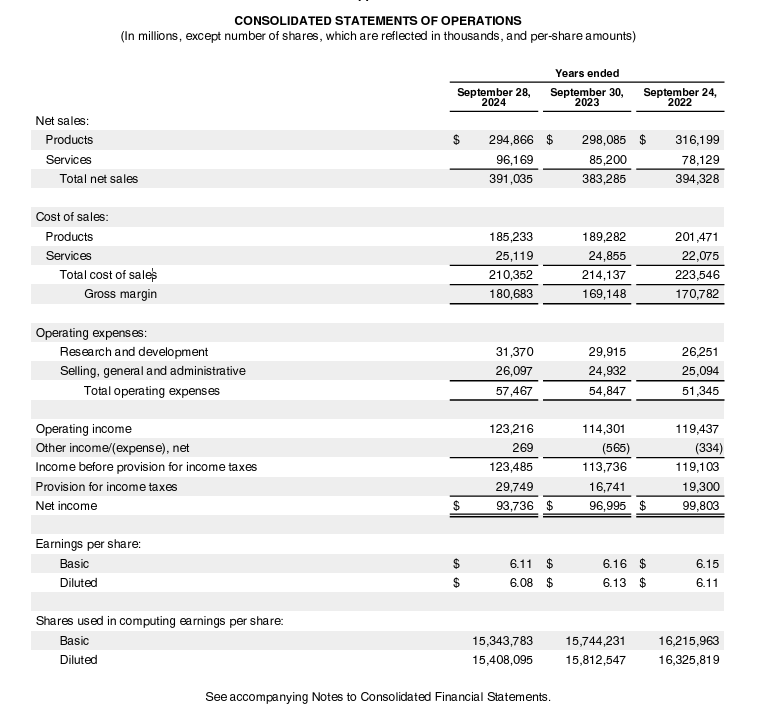


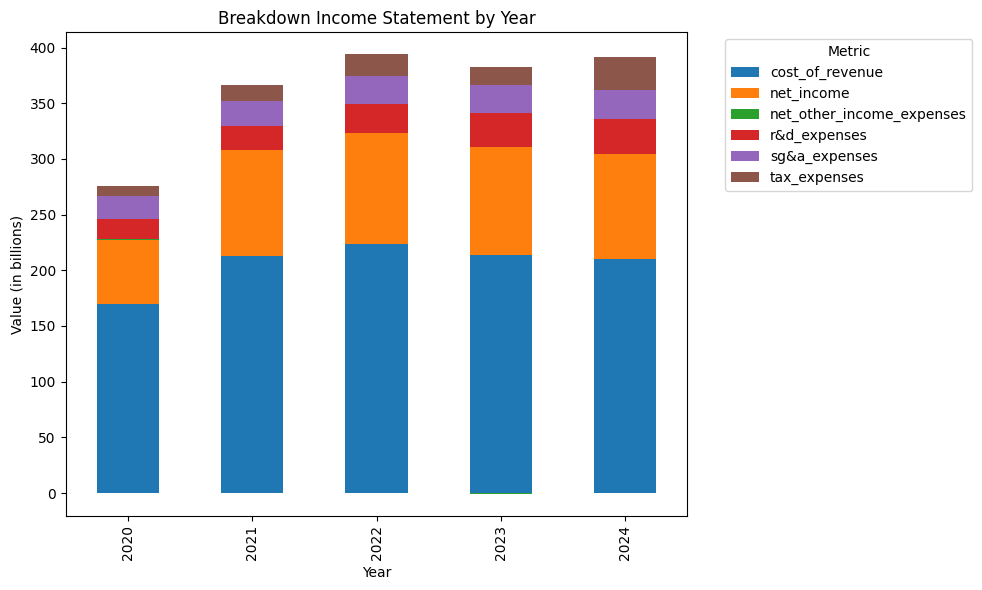

In [38]:
pivot_df_income_statement.plot(
    kind='bar',
    stacked=True, 
    figsize=(10,6)
)

plt.title('Breakdown Income Statement by Year')
plt.xlabel('Year')
plt.ylabel('Value (in billions)')
plt.legend(title = 'Metric',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show()

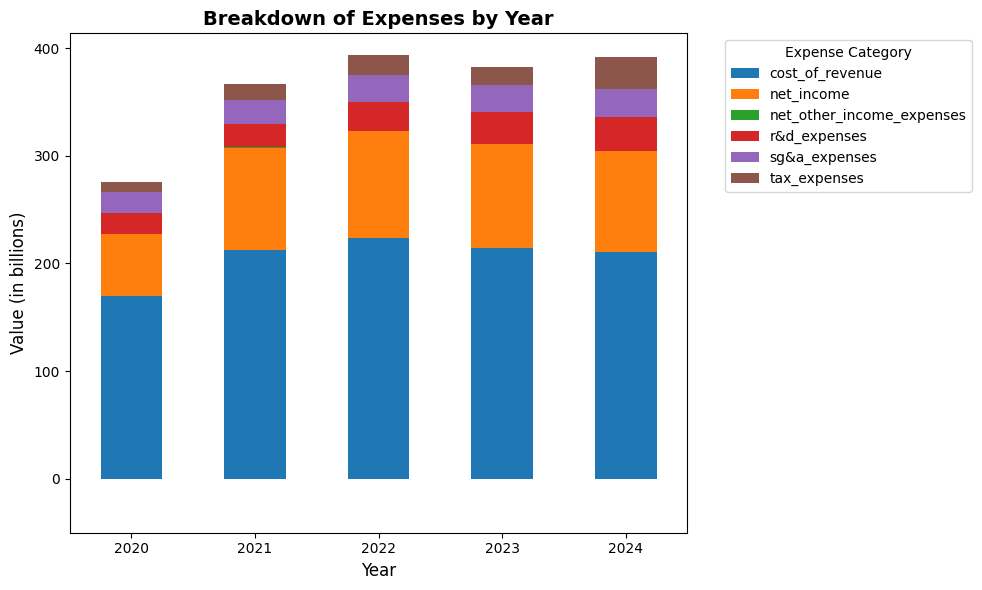

In [39]:
fig, ax = plt.subplots(figsize = (10,6))
pivot_df_income_statement.plot(
    kind='bar',
    stacked=True,
    ax = ax
)

# Add formatting
ax.set_title("Breakdown of Expenses by Year", fontsize=14, fontweight="bold")
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Value (in billions)", fontsize=12)

# Move legend outside
ax.legend(title="Expense Category", bbox_to_anchor=(1.05, 1), loc="upper left")

# Rotate x labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylim(-50, None)
plt.tight_layout()
plt.show()

In [40]:
# 100% stack bar 
e = pivot_df_income_statement.sort_index()

In [41]:
col_order = [
    "cost_of_revenue",
    "r&d_expenses",
    "sg&a_expenses",
    "net_other_income_expenses",
    "tax_expenses",
    "net_income"
]

In [42]:
e = e[col_order]
e

Metric,cost_of_revenue,r&d_expenses,sg&a_expenses,net_other_income_expenses,tax_expenses,net_income
calendarYear,,,,,,
2020,169.559,18.752,19.916,0.803,9.680,57.411
2021,212.981,21.914,21.973,0.258,14.527,94.680
2022,223.546,26.251,25.094,-0.334,19.300,99.803
2023,214.137,29.915,24.932,-0.565,16.741,96.995
2024,210.352,31.370,26.097,0.269,29.749,93.736


In [43]:
# normalizae each row to 100% 
e_pct = e.div(e.sum(axis=1),axis=0) * 100

In [44]:
e_pct

Metric,cost_of_revenue,r&d_expenses,sg&a_expenses,net_other_income_expenses,tax_expenses,net_income
calendarYear,,,,,,
2020,61.407499,6.791226,7.212780,0.290815,3.505709,20.791972
2021,58.138633,5.981989,5.998095,0.070428,3.965518,25.845337
2022,56.786567,6.668445,6.374536,-0.084845,4.902708,25.352589
2023,56.034070,7.827976,6.524054,-0.147846,4.380683,25.381063
2024,53.719741,8.011278,6.664658,0.068697,7.597306,23.938321


In [45]:
e_pct2 = e_pct.drop(columns='net_other_income_expenses')

In [46]:
replace_name = {
    "cost_of_revenue": "% COGS",
    "r&d_expenses": "% R&D",
    "sg&a_expenses": "% SG&A",
    "net_other_income_expenses": "% Other Income/Expenses",
    "tax_expenses": "% Taxes",
    "net_income": "% Net Margin"
}

e_pct2 = e_pct2.rename(columns=replace_name)


In [47]:
e_pct2

Metric,% COGS,% R&D,% SG&A,% Taxes,% Net Margin
calendarYear,,,,,
2020,61.407499,6.791226,7.212780,3.505709,20.791972
2021,58.138633,5.981989,5.998095,3.965518,25.845337
2022,56.786567,6.668445,6.374536,4.902708,25.352589
2023,56.034070,7.827976,6.524054,4.380683,25.381063
2024,53.719741,8.011278,6.664658,7.597306,23.938321


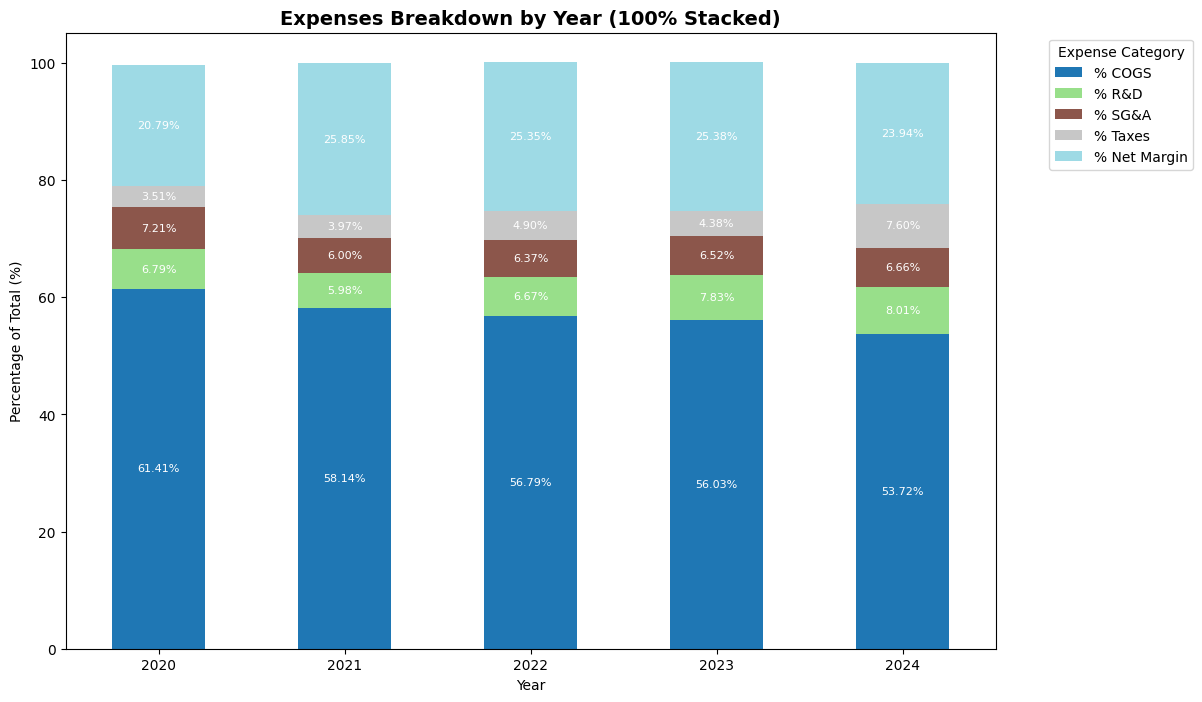

In [48]:
fig, ax = plt.subplots(figsize = (12,8))
e_pct2.plot(
    kind = 'bar',
    stacked=True,
    ax = ax,
    colormap='tab20'
)
#Formatting
ax.set_title("Expenses Breakdown by Year (100% Stacked)", fontsize=14, fontweight="bold")
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Total (%)")
ax.legend(title="Expense Category", bbox_to_anchor=(1.05,1), loc="upper left")

# Tidy x-ticks
ax.set_xticklabels(e_pct.index.astype(str), rotation=0)

# Add labels inside each bar
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.2f%%",          # format as percent with 1 decimal
        label_type="center",   # place inside each segment
        fontsize=8,
        color="white"          # contrast against bar color
    )

plt.show()

# To do: Aug 19, 2025 | 4:21 pm - 6:03 pm  
[X] Complete Chart Stacked Bar
    
    [x] Work on color pattern 
    
    [X] Work on figure.text for title and subtitle  
    
    [X] Remove `other income/expense` from the chart and make the note 
    
    [X] Add credits: name | data source  

Outstanding:  
[ ] Realignment after removing fig_size

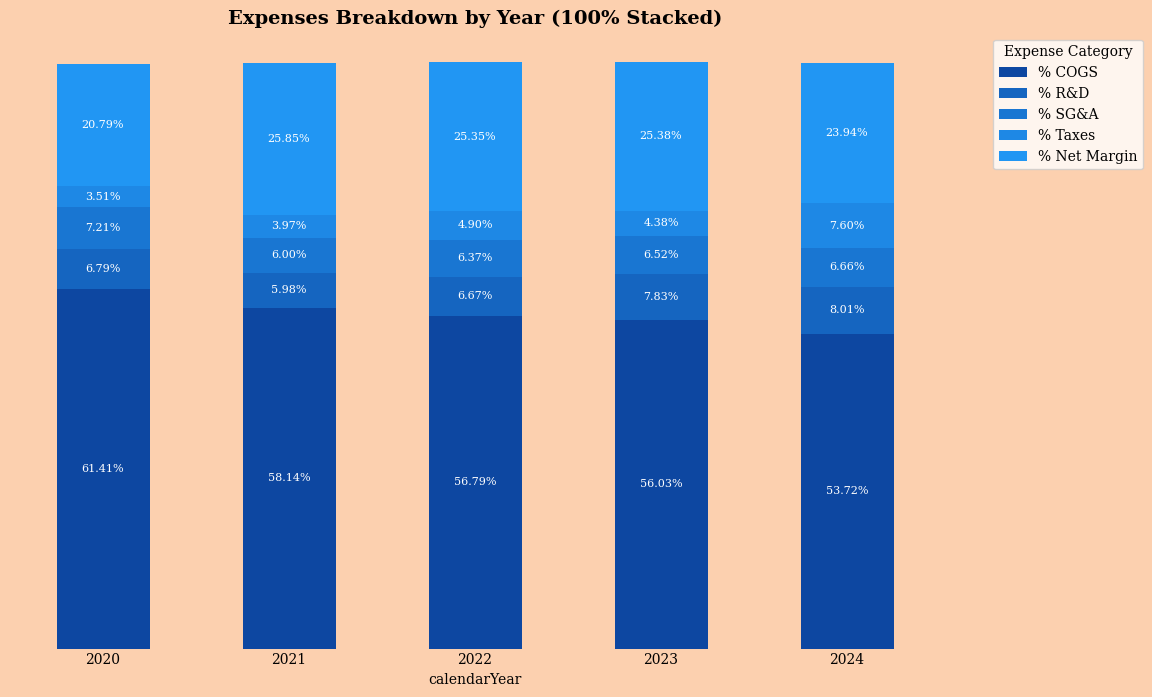

In [121]:
colors_2024 = ['#0d47a1', '#1565c0', '#1976d2', '#1e88e5', '#2196f3']
colors_prior = ['#212529', '#343a40', '#495057','#6c757d', '#adb5bd']
fig, ax = plt.subplots(figsize = (12,8))
e_pct2.plot(
    kind = 'bar',
    stacked=True,
    ax = ax,
    color=colors_2024
)
#Formatting
ax.set_title("Expenses Breakdown by Year (100% Stacked)", fontsize=14, fontweight="bold")
ax.legend(title="Expense Category", bbox_to_anchor=(1.05,1), loc="upper left")
for spine in ['top', 'right','left', 'bottom']:
    ax.spines[spine].set_visible(False)

ax.tick_params(labelleft=False,length=0)
ax.set_facecolor(background_color)
fig.set_facecolor(background_color)

# Tidy x-ticks
ax.set_xticklabels(e_pct.index.astype(str), rotation=0)

# Add labels inside each bar
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.2f%%",          # format as percent with 1 decimal
        label_type="center",   # place inside each segment
        fontsize=8,
        color="white"          # contrast against bar color
    )



plt.show()

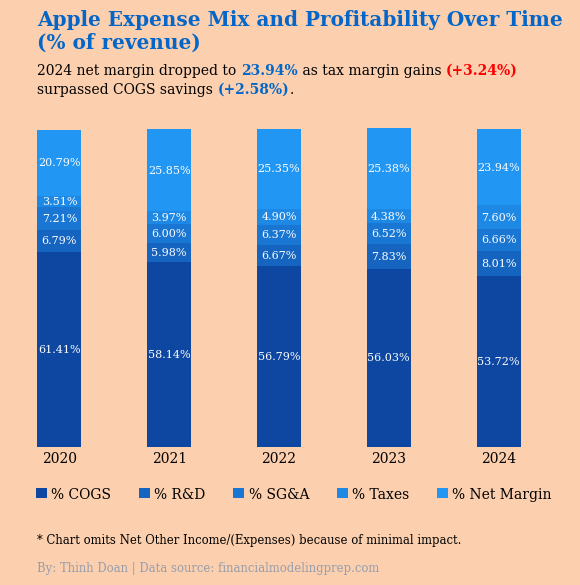

In [123]:
# pick a distinct color for each category (5 categories = 5 colors)
colors_by_cat = {
    '% COGS':      '#0d47a1',
    '% R&D':       '#1565c0',
    '% SG&A':      '#1976d2',
    '% Taxes':     '#1e88e5',
    '% Net Margin':'#2196f3',
}

# build the color list to match your DataFrame's column order
colors_for_df = [colors_by_cat.get(c, '#999999') for c in e_pct2.columns]

fig, ax = plt.subplots()
e_pct2.plot(
    kind='bar',
    stacked=True,
    width = .4,
    ax=ax,
    color=colors_for_df
)

# Formatting
ax.legend(loc='lower left',
           bbox_to_anchor=(0.025, -.2),  # push legend below chart
           ncol=len(e_pct2.columns),     # put all items in one row
           frameon=False,
        handlelength=.8,   # shorten line marker length
        handletextpad=0.3)   # reduce gap between marker and text)
ax.tick_params(labelleft=False,length=0)

# Clean frame
for s in ['top','right','left','bottom']:
    ax.spines[s].set_visible(False)

# Hide y ticks completely
ax.set_yticks([])

# Tidy x-ticks (use e_pct2, not e_pct)
ax.set_xticks(range(len(e_pct2.index)))
ax.set_xticklabels(e_pct2.index.astype(str), rotation=0)
ax.set_xlabel('')

# Labels inside each bar:
# If your values are proportions (0-1), multiply by 100; if already 0-100, drop the *100.
for container in ax.containers:
    labels = [f"{bar.get_height():.2f}%" for bar in container]  # change to f"{bar.get_height():.1f}%" if already 0-100
    ax.bar_label(container, labels=labels, label_type="center", fontsize=8, color="white")


ax.set_facecolor(background_color)
fig.set_facecolor(background_color)

# add title 
fig.text(x = 0.1, y = 1 ,s='Apple Expense Mix and Profitability Over Time \n(% of revenue)',color=blue,fontsize = 'x-large', fontweight = 'bold')
fig_text(x = 0.1, y = .97 ,s=f"2024 net margin dropped to <23.94%> as tax margin gains <(+3.24%)> \nsurpassed COGS savings <(+2.58%)>.", highlight_textprops=[{'color':blue,'fontweight':'bold'} , {'color':'red','fontweight':'bold'},{'color':blue,'fontweight':'bold'}   ])
# add credit  7
fig.text(x = 0.1, y = -.03, s = '* Chart omits Net Other Income/(Expenses) because of minimal impact.', color = 'black', fontsize = 'small')
fig.text(x = 0.1, y = -.09, s = 'By: Thinh Doan | Data source: financialmodelingprep.com', color = grey, fontsize = 'small')
plt.tight_layout()
plt.show()

In [51]:
print(e_pct2.columns)

Index(['% COGS', '% R&D', '% SG&A', '% Taxes', '% Net Margin'], dtype='object', name='Metric')


# Data Visualization

What are the steps: 
- Draft visual
  - Chart title: Apple 5 Year Revenue Performance (2020 - 2025) 
  - Chart subtitle: Apple revenues show steady increase over 5 year with xx% a year 
  - Chart credit: viz by: ThinhD, data source: FMP, 
    - [x] to calculate for CARG ratio 
  - Chart type - Chart color - Color pallets
    - [x] use https://y-sunflower.github.io/morethemes/#__tabbed_1_6    
    - => Decided to not use theme as I want to make more control of the chart   


Make chart showing cartoon style - 
https://matplotlib.org/stable/gallery/showcase/xkcd.html#sphx-glr-gallery-showcase-xkcd-py


# Chart 2: Breakdown IncomeStement 100% Stack Bar 
- formatting for consistency with Chart 1 
- how to make the 2 charts into the same fig 
- how to make the negative value to show better (probably remove it, then show in the note)
- try out to see how it look when I have the year on y-axes, while x-axes the value 

apple 10k source: https://www.sec.gov/Archives/edgar/data/320193/000032019324000123/aapl-20240928.htm#i7bfbfbe54b9647b1b4ba4ff4e0aba09d_178 

# Thoughts: 
- Read the data through the company's 10k. Reasons: 10k has html format => visualize 10k report. 
- After processing the data, I can store the result into a database, then use powerBI to visualize the financial statement 

# Waterfall Chart: Apple Income Statement 2024

In [52]:
df_income_statement_2024 = df_income_statement[df_income_statement['calendarYear'] == 2024]
df_income_statement_2024

,calendarYear,Metric,Value
0,2024,revenue,391.035
5,2024,cost_of_revenue,210.352
20,2024,r&d_expenses,31.370
35,2024,sg&a_expenses,26.097
90,2024,net_other_income_expenses,0.269
105,2024,tax_expenses,29.749
110,2024,net_income,93.736


In [53]:
# to add negative value to expense items
expense_items = ["cost_of_revenue", "r&d_expenses", "sg&a_expenses", "tax_expenses"]

df_income_statement_2024.loc[
    df_income_statement_2024["Metric"].isin(expense_items),
    "Value"
] *= -1

In [54]:
df_income_statement_2024

,calendarYear,Metric,Value
0,2024,revenue,391.035
5,2024,cost_of_revenue,-210.352
20,2024,r&d_expenses,-31.370
35,2024,sg&a_expenses,-26.097
90,2024,net_other_income_expenses,0.269
105,2024,tax_expenses,-29.749
110,2024,net_income,93.736


In [55]:
df_income_statement_2024['Cum'] = df_income_statement_2024['Value'].cumsum()
df_income_statement_2024

C:\Users\dqthi\AppData\Local\Temp\ipykernel_27980\3280756369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_statement_2024['Cum'] = df_income_statement_2024['Value'].cumsum()


,calendarYear,Metric,Value,Cum
0,2024,revenue,391.035,391.035
5,2024,cost_of_revenue,-210.352,180.683
20,2024,r&d_expenses,-31.370,149.313
35,2024,sg&a_expenses,-26.097,123.216
90,2024,net_other_income_expenses,0.269,123.485
105,2024,tax_expenses,-29.749,93.736
110,2024,net_income,93.736,187.472


In [56]:
df_income_statement_2024["Bottom"] = df_income_statement_2024["Cum"].shift(fill_value=0)

C:\Users\dqthi\AppData\Local\Temp\ipykernel_27980\3671618995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income_statement_2024["Bottom"] = df_income_statement_2024["Cum"].shift(fill_value=0)


In [57]:
df_income_statement_2024

,calendarYear,Metric,Value,Cum,Bottom
0,2024,revenue,391.035,391.035,0.000
5,2024,cost_of_revenue,-210.352,180.683,391.035
20,2024,r&d_expenses,-31.370,149.313,180.683
35,2024,sg&a_expenses,-26.097,123.216,149.313
90,2024,net_other_income_expenses,0.269,123.485,123.216
105,2024,tax_expenses,-29.749,93.736,123.485
110,2024,net_income,93.736,187.472,93.736


### Source to learn about Waterfall Chart
https://coderzcolumn.com/tutorials/data-science/waterfall-chart-using-matplotlib



In [58]:
df_income_statement_2024.loc[df_income_statement_2024.index[[0, -1]], "Bottom"] = 0

In [59]:
df_income_statement_2024

,calendarYear,Metric,Value,Cum,Bottom
0,2024,revenue,391.035,391.035,0.000
5,2024,cost_of_revenue,-210.352,180.683,391.035
20,2024,r&d_expenses,-31.370,149.313,180.683
35,2024,sg&a_expenses,-26.097,123.216,149.313
90,2024,net_other_income_expenses,0.269,123.485,123.216
105,2024,tax_expenses,-29.749,93.736,123.485
110,2024,net_income,93.736,187.472,0.000


In [60]:
# step 3: define color 
colors = []
for i, row in df_income_statement_2024.iterrows():
    if i in (0, len(df) - 1):  # start or end
        colors.append("purple")
    else:
        colors.append("green" if row["Value"] >= 0 else "red")

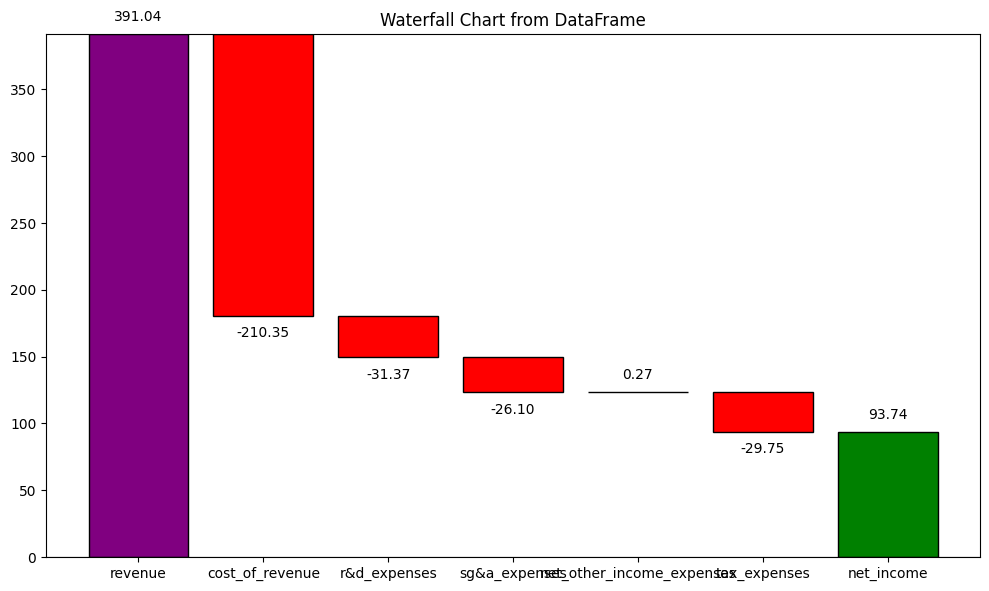

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))

# Use numeric positions for x
x = range(len(df_income_statement_2024))

ax.bar(x, df_income_statement_2024["Value"], bottom=df_income_statement_2024["Bottom"],
       color=colors, edgecolor="black")

# Add labels below bars
ax.set_xticks(x)
ax.set_xticklabels(df_income_statement_2024["Metric"], ha="center")

# Zero line
ax.axhline(0, color="black", linewidth=0.8)

# Add values on top/bottom of bars
y_span = ax.get_ylim()[1] - ax.get_ylim()[0]
for pos, (val, bot) in enumerate(zip(df_income_statement_2024["Value"], df_income_statement_2024["Bottom"])):
    top = bot + val
    offset = 0.02 * y_span if val >= 0 else -0.02 * y_span  # small relative nudge
    ax.text(pos, top + offset, f"{val:,.2f}",
            ha="center", va="bottom" if val >= 0 else "top")

ax.set_title("Waterfall Chart from DataFrame")
plt.tight_layout()
plt.show()


In [62]:
x

range(0, 7)

# Sankey Chart: to show the movement between 2 year

### how to do it?  
[X] step 1: getting the proper dataframe:  income_statement_items | 2023 | 2024  
step 2: 

In [63]:
df_income_statement_2024

,calendarYear,Metric,Value,Cum,Bottom
0,2024,revenue,391.035,391.035,0.000
5,2024,cost_of_revenue,-210.352,180.683,391.035
20,2024,r&d_expenses,-31.370,149.313,180.683
35,2024,sg&a_expenses,-26.097,123.216,149.313
90,2024,net_other_income_expenses,0.269,123.485,123.216
105,2024,tax_expenses,-29.749,93.736,123.485
110,2024,net_income,93.736,187.472,0.000


In [64]:
df_income_statement_2023 = df_income_statement[df_income_statement['calendarYear'] == 2023]

In [65]:
df_income_statement_2023

,calendarYear,Metric,Value
1,2023,revenue,383.285
6,2023,cost_of_revenue,214.137
21,2023,r&d_expenses,29.915
36,2023,sg&a_expenses,24.932
91,2023,net_other_income_expenses,-0.565
106,2023,tax_expenses,16.741
111,2023,net_income,96.995


In [66]:
df_2023_2024 = pd.merge(df_income_statement_2023,df_income_statement_2024, on=['Metric'],suffixes=('2023','2024'))
df_2023_2024

,calendarYear2023,Metric,Value2023,calendarYear2024,Value2024,Cum,Bottom
0,2023,revenue,383.285,2024,391.035,391.035,0.000
1,2023,cost_of_revenue,214.137,2024,-210.352,180.683,391.035
2,2023,r&d_expenses,29.915,2024,-31.370,149.313,180.683
3,2023,sg&a_expenses,24.932,2024,-26.097,123.216,149.313
4,2023,net_other_income_expenses,-0.565,2024,0.269,123.485,123.216
5,2023,tax_expenses,16.741,2024,-29.749,93.736,123.485
6,2023,net_income,96.995,2024,93.736,187.472,0.000


In [67]:
df_2023_2024.drop(columns=['calendarYear2023','calendarYear2024','Cum','Bottom'], inplace=True)

In [68]:
df_2023_2024

,Metric,Value2023,Value2024
0,revenue,383.285,391.035
1,cost_of_revenue,214.137,-210.352
2,r&d_expenses,29.915,-31.370
3,sg&a_expenses,24.932,-26.097
4,net_other_income_expenses,-0.565,0.269
5,tax_expenses,16.741,-29.749
6,net_income,96.995,93.736


In [69]:
df_2023_2024['dif'] = df_2023_2024['Value2024'] - df_2023_2024['Value2023']

In [70]:
# to add negative value to expense items
expense_items = ["cost_of_revenue", "r&d_expenses", "sg&a_expenses", "tax_expenses"]

df_2023_2024.loc[
    df_2023_2024["Metric"].isin(expense_items),
    "Value2024"
] *= -1

In [71]:
from pySankey.sankey import sankey

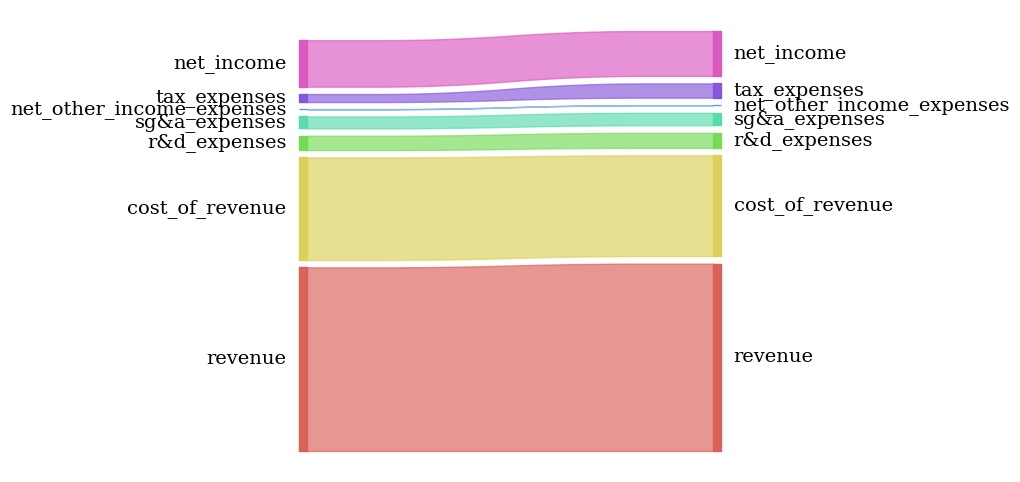

In [72]:
sankey(
    left=df_2023_2024['Metric'],right=df_2023_2024['Metric'],leftWeight=df_2023_2024['Value2023'],rightWeight=df_2023_2024['Value2024']
)

In [ ]:
df_2023_2024.loc[df_2023_2024['Metric'] =='revenue','Metric']

0    revenue
Name: Metric, dtype: object

In [ ]:
df_2023_2024['Metric']

0                      revenue
1              cost_of_revenue
2                 r&d_expenses
3                sg&a_expenses
4    net_other_income_expenses
5                 tax_expenses
6                   net_income
Name: Metric, dtype: object

In [ ]:
help(sankey)

Help on function sankey in module pySankey.sankey:

sankey(left, right, leftWeight=None, rightWeight=None, colorDict=None, leftLabels=None, rightLabels=None, aspect=4, rightColor=False, fontsize=14, figure_name=None, closePlot=False)
    Make Sankey Diagram showing flow from left-->right
    
    Inputs:
        left = NumPy array of object labels on the left of the diagram
        right = NumPy array of corresponding labels on the right of the diagram
            len(right) == len(left)
        leftWeight = NumPy array of weights for each strip starting from the
            left of the diagram, if not specified 1 is assigned
        rightWeight = NumPy array of weights for each strip starting from the
            right of the diagram, if not specified the corresponding leftWeight
            is assigned
        colorDict = Dictionary of colors to use for each label
            {'label':'color'}
        leftLabels = order of the left labels in the diagram
        rightLabels = order of

In [ ]:
# assume df_2023_2024 has columns: Metric, Value2023, Value2024
year_col = "Value2024"

# Convert the column to numeric just in case it's stored as strings
df_2023_2024[year_col] = pd.to_numeric(df_2023_2024[year_col], errors="coerce")

# Build a dictionary {metric: value}
vals = df_2023_2024.set_index("Metric")[year_col].to_dict()

# rev   = float(vals["revenue"])
# cogs  = abs(vals["cost_of_revenue"])
# rnd   = abs(vals["r&d_expenses"])
# sga   = abs(vals["sg&a_expenses"])
# tax   = abs(vals["tax_expenses"])
# other = float(vals["net_other_income_expenses"])   # can be +/- 
# # residual that should go from Revenue to Net income (excludes 'other')
# residual_to_net = rev - (cogs + rnd + sga + tax)

# left  = []
# right = []
# w     = []

# # Revenue -> expense/tax buckets
# for tgt_label, amount in [
#     ("Cost of revenue", cogs),
#     ("R&D", rnd),
#     ("SG&A", sga),
#     ("Taxes", tax),
# ]:
#     if amount > 0:
#         left.append("Revenue")
#         right.append(tgt_label)
#         w.append(amount)

# # Revenue -> Net income (residual)
# if residual_to_net > 0:
#     left.append("Revenue")
#     right.append("Net income")
#     w.append(residual_to_net)

# # Handle Other income/expense:
# # positive other: Other -> Net income
# # negative other: Revenue -> Other (as another outflow)
# if other > 0:
#     left.append("Other income/expense")
#     right.append("Net income")
#     w.append(other)
# elif other < 0:
#     left.append("Revenue")
#     right.append("Other income/expense")
#     w.append(abs(other))

# # OPTIONAL sanity check (won’t crash the plot)
# # np.testing.assert_allclose(residual_to_net + max(other, 0), vals["net_income"], rtol=0, atol=1e-3)

# # Build Sankey
# sankey(
#     left=left,
#     right=right,
#     leftWeight=w,   # one weight per flow
#     rightWeight=None,
#     leftLabels=["Revenue", "Other income/expense"],   # optional; labels on side bars
#     rightLabels=["Cost of revenue","R&D","SG&A","Taxes","Net income","Other income/expense"],
#     fontsize=12,
#     aspect=8
# )

In [ ]:
vals

{'revenue': 391.035,
 'cost_of_revenue': 210.352,
 'r&d_expenses': 31.37,
 'sg&a_expenses': 26.097,
 'net_other_income_expenses': 0.269,
 'tax_expenses': 29.749,
 'net_income': 93.736}

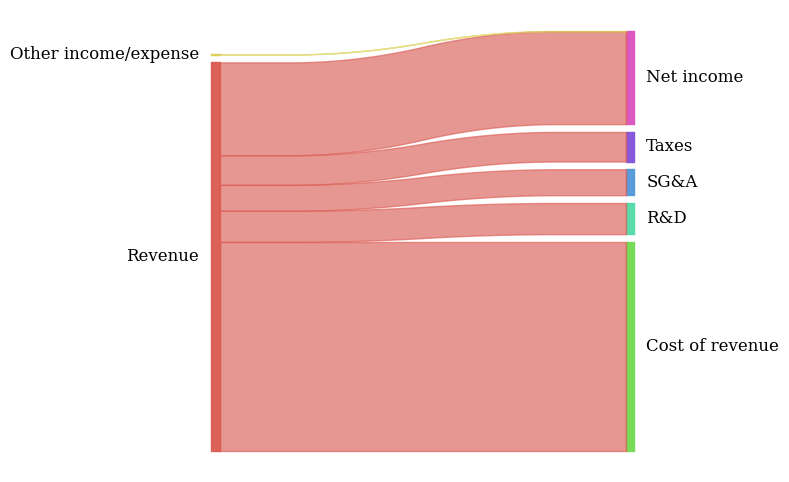

In [ ]:
def to_scalar(x):
    # Convert Series/list/ndarray to a single float if it has one value
    if isinstance(x, pd.Series):
        x = x.values
    x = np.array(x)
    if x.size != 1:
        raise ValueError(f"Expected a single value, got shape {x.shape} with {x}")
    return float(x.ravel()[0])

# ---- Prepare data safely ----
year_col = "Value2024"          # must be a STRING, not a list like ["Value2024"]
df = df_2023_2024.copy()

# Ensure numeric column
df[year_col] = pd.to_numeric(df[year_col], errors="coerce")

# Build clean dict of scalars
vals = {m: to_scalar(v) for m, v in df.set_index("Metric")[year_col].items()}

# Pull & sanitize numbers
rev   = to_scalar(vals["revenue"])
cogs  = abs(to_scalar(vals["cost_of_revenue"]))
rnd   = abs(to_scalar(vals["r&d_expenses"]))
sga   = abs(to_scalar(vals["sg&a_expenses"]))
tax   = abs(to_scalar(vals["tax_expenses"]))
other = to_scalar(vals["net_other_income_expenses"])  # may be +/- 
residual_to_net = rev - (cogs + rnd + sga + tax)

# ---- Build flows (lists must be same length) ----
left, right, w = [], [], []

for tgt, amt in [("Cost of revenue", cogs), ("R&D", rnd), ("SG&A", sga), ("Taxes", tax)]:
    if amt > 0:
        left.append("Revenue"); right.append(tgt); w.append(amt)

if residual_to_net > 0:
    left.append("Revenue"); right.append("Net income"); w.append(residual_to_net)

if other > 0:
    left.append("Other income/expense"); right.append("Net income"); w.append(other)
elif other < 0:
    left.append("Revenue"); right.append("Other income/expense"); w.append(abs(other))

# Optional sanity check:
# assert abs((residual_to_net + max(other, 0.0)) - vals["net_income"]) < 1e-6

sankey(left=left, right=right, leftWeight=w, rightWeight=None, fontsize=12, aspect=300)

# To do: Aug 19, 2025 | 4:21 pm 
[ ] Complete Chart Stacked Bar
    
    [x] Work on color pattern 
    
    [ ] Work on figure.text for title and subtitle  
    
    [ ] Remove `other income/expense` from the chart and make the note 
    
    [ ] Add credits: name | data source  

In [ ]:
bar